In [1]:
#importing Librarires
import os
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Finding target class
filepath = "/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/potato/"
name_class = os.listdir(filepath)
name_class

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/potato/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Setting up the path for train and test data
data_train_path = "/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/train/"
data_test_path = "/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/potato"

###**Loading Dataset**


In [ ]:
#defining dimensions of the image
img_width = 224
img_height = 224

# Load training dataset from the directory
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=50,
    validation_split=False)

# Get the class names from the training dataset
data_cat = data_train.class_names

# Load test dataset from the directory
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)


#plotting the sample images
plt.figure(figsize = (15,15))

# Plotting one batch of images and labels from the training dataset
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

###**Rescaling and Augumentation of images**

In [ ]:
# Define a Sequential model to resize and rescale images
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(img_width, img_height),
    layers.Rescaling(1.0/255)
])


# Define a Sequential model for data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.4),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.4),
])

###**Model Building**

In [ ]:
# Define the Sequential model
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,

    # First convolutional block
    layers.Conv2D(8, 3, padding="same", activation="relu", input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(),

    # Second convolutional block
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    # Third convolutional block
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    # Fourth convolutional block
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

     # Fifth convolutional block
    layers.Conv2D(128, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    # Sixth convolutional block
    layers.Conv2D(256, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    # Seventh convolutional block
    layers.Conv2D(512, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),

    # Eighth convolutional block
    layers.Conv2D(512, 3, padding="same", activation="relu"),

    # Flatten the tensor to a vector
    layers.Flatten(),
    #dropout layer
    layers.Dropout(0.5),

    # Fully connected layer
    layers.Dense(512, activation="relu"),

    # Output layer
    layers.Dense(len(data_cat), activation="softmax")

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**Model Training**

In [ ]:
# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs_size = 15

history = model.fit(data_train, validation_data=data_test, epochs=epochs_size)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.3889 - loss: 1.0851 - val_accuracy: 0.3037 - val_loss: 1.1070
Epoch 2/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.3615 - loss: 1.0636 - val_accuracy: 0.2815 - val_loss: 1.0394
Epoch 3/15
58/58 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.4350 - loss: 0.9833 - val_accuracy: 0.6963 - val_loss: 0.7729
Epoch 4/15
29/58 ━━━━━━━━━━━━━━━━━━━━ 1:29 3s/step - accuracy: 0.6169 - loss: 0.8355

###**`Model Evaluation`**

In [ ]:
# Evaluate the model on the test dataset

scores = model.evaluate(data_test)

ValueError: You must call `compile()` before using the model.

In [ ]:
#result of evaluation
for metric_name, score in zip(model.metrics_names, scores):
    print(f"{metric_name}: {score}")

loss: 0.19636501371860504
accuracy: 0.9283950328826904


In [ ]:
#summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 16)        0         
 g2D)                                                 

1/1 [==============================] - 0s 146ms/step


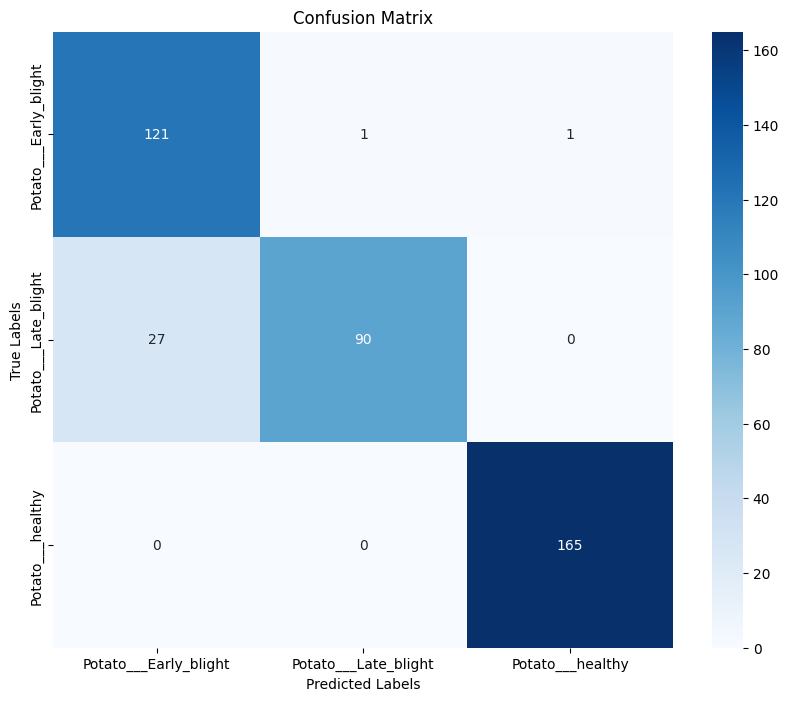

In [ ]:
# Generate confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset to get true labels and predicted labels
for images_batch, labels_batch in data_test:
    true_labels.extend(labels_batch.numpy())
    batch_predictions = model.predict(images_batch)
    predicted_labels.extend(np.argmax(batch_predictions, axis=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate accuracy
accuracy = scores[1]
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 92.84%


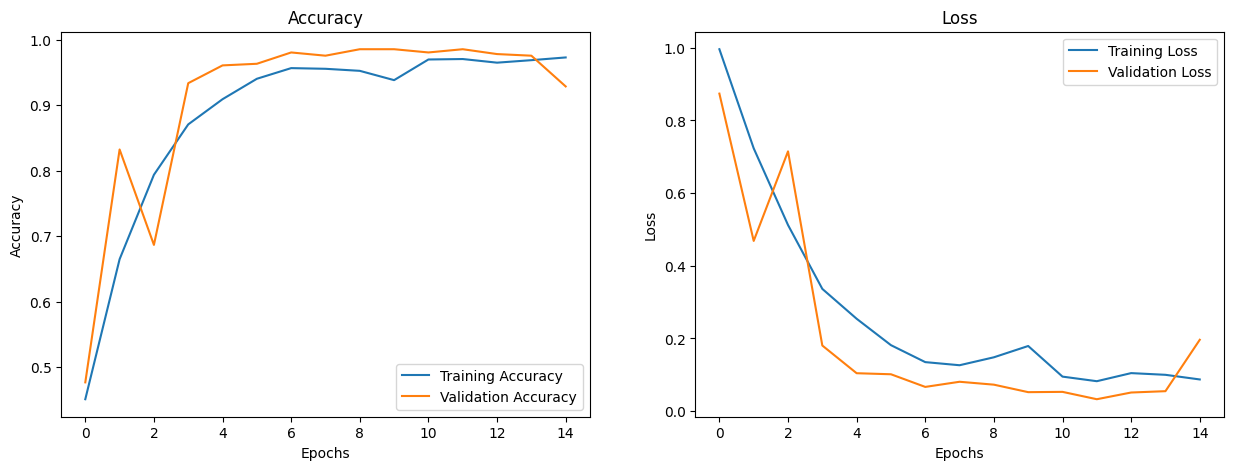

In [ ]:
#define the range of epochs
epochs_range = range(epochs_size)

#create a figure for plotting
plt.figure(figsize=(15, 5))

#plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

###**Model Prediction**

In [ ]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    max_prediction = np.max(predictions[0])
    sum_predictions = np.sum(predictions[0])

    confidence = np.clip(round((max_prediction / sum_predictions) * 100, 2), 0, 100)
    predicted_class = data_cat[np.argmax(predictions[0])]

    return predicted_class, confidence

# Extract a batch of training images and store the first 9 images in a list
training_images = []
for images, labels in data_train.take(1):
    for i in range(9):
        training_images.append(images[i].numpy())

# Plot the 9 images with their actual and predicted labels
plt.figure(figsize=(15, 15))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(training_images[i].astype("uint8"))
    predicted_class, confidence = predict(model, training_images[i])
    actual_class = data_cat[labels[i]]

    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Extract a batch of training images and store the first 9 images in a list
training_images = []
for images, labels in data_train.take(1):
    for i in range(9):
        training_images.append(images[i].numpy())


# Plot the 9 images with their actual and predicted labels
plt.figure(figsize=(15, 15))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(training_images[i].astype("uint8"))
    predicted_class, confidence = predict(model, training_images[i])
    actual_class = data_cat[labels[i]]

    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")

plt.show()

Output hidden; open in https://colab.research.google.com to view.

First image to predict:
Actual label: Potato___Early_blight
1/1 [==============================] - 0s 61ms/step
predicted label: Potato___Early_blight


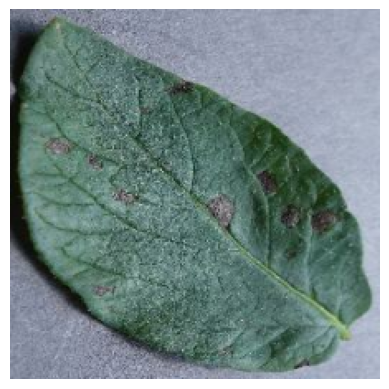

In [ ]:
# Find the index of the maximum value in the list
np.argmax([26.436392, 2.0658166, -20.604046, 15.68354, -18.17734,
           -6.4164414, 13.573213, 11.388335, -0.52048355])

# Predict the label for the first image in the test dataset
for images_batch, labels_batch in data_test.take(1):
    first_image = images_batch[1].numpy().astype('uint8')
   # first_image=r"/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/potato/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG"
    first_label = labels_batch[0].numpy()
    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis("off")
    print("Actual label:", data_cat[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:", data_cat[np.argmax(batch_prediction[0])])


# Function to predict the class of a single image
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    max_prediction = np.max(predictions[0])
    sum_predictions = np.sum(predictions[0])

    confidence = np.clip(round((max_prediction / sum_predictions) * 100, 2), 0, 100)
    predicted_class = data_cat[np.argmax(predictions[0])]

    return predicted_class, confidence




In [ ]:
import os
# List all files in the directory
files = os.listdir("/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/model")
print(files)

# Filter out filenames with valid extensions
valid_files = [file for file in files if file.endswith('.keras')]

# Extract version numbers and increment the maximum version by 1
model_version = max([int(file.split('.')[0]) for file in valid_files] + [0]) + 1

# Save the model with the new version number in the native Keras format
model.save(f"/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/model/{model_version}.keras")

['1.keras', '2.keras', '3.keras', '4.keras', '5.keras', '6.keras']


1/1 [==============================] - 0s 127ms/step


(-0.5, 223.5, 223.5, -0.5)

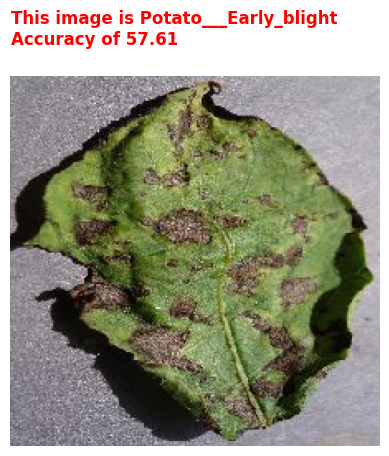

In [ ]:
image = '/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178 (1).JPG'

img_width = 224
img_height = 224

image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

plt.text(0, -20, 'This image is {} \nAccuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100 ), fontsize=12, color='red',fontweight='bold')


plt.imshow(image)
plt.axis("off")

1/1 [==============================] - 0s 34ms/step


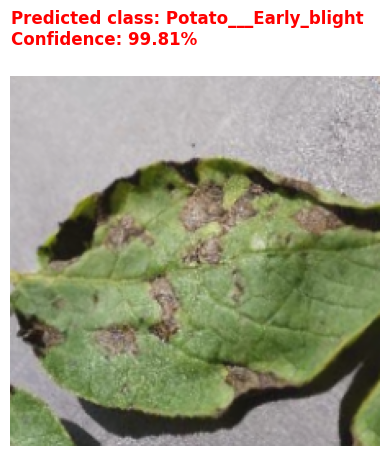

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.2),
])

# Load and preprocess the image
image_path = '/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/assets/potato/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG' #with the path to your image file
img_width = 226
img_height = 226

# Load the image
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
image_array = tf.keras.utils.img_to_array(image)
image_batch = tf.expand_dims(image_array, 0)

# Apply data augmentation
augmented_image_batch = data_augmentation(image_batch)

# Convert the augmented image tensor to a NumPy array
augmented_image_np = augmented_image_batch[0].numpy().astype("uint8")

# Make predictions on the augmented image
predictions = model.predict(augmented_image_batch)

# Get the predicted class and confidence
predicted_class = data_cat[np.argmax(predictions)]
confidence = np.max(predictions)

# Plot the augmented image with prediction
plt.imshow(augmented_image_np)
plt.axis("off")
plt.text(0, -20, 'Predicted class: {} \nConfidence: {:.2f}%'.format(predicted_class, confidence * 100),
         fontsize=12, color='red', fontweight='bold')
plt.show()

In [ ]:
import os
# List all files in the directory
files = os.listdir("/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/model")
print(files)

# Filter out filenames with valid extensions
valid_files = [file for file in files if file.endswith('.keras')]

# Extract version numbers and increment the maximum version by 1
model_version = max([int(file.split('.')[0]) for file in valid_files] + [0]) + 1

# Save the model with the new version number in the native Keras format
model.save(f"/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/model/{model_version}.keras")

['1.keras', '2.keras', '3.keras', '4.keras', '5.keras', '6.keras', '7.keras', '8.keras']


In [ ]:
!pip install -q streamlit

In [ ]:
!pip install streamlit
!npm install -g localtunnel



changed 22 packages, and audited 23 packages in 888ms

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.44.15.167


In [ ]:
%%writefile app.py

import streamlit as st
st.write('Hello, *World!* :sunglasses:')


Writing app.py


In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the pre-trained model
model = load_model(r"/content/drive/MyDrive/Colab Notebooks/leaf_disease_detection_DL/model/8.keras")
data_cat = ['Potato__Early_blight', 'Potato_Late_blight', 'Potato__healthy']

# Streamlit UI
st.markdown("<h1 style='text-align: center; font-family: Italic; color: green;'>Leaf Disease Detection</h1>", unsafe_allow_html=True)
st.sidebar.title("Project Overview")
st.sidebar.info(
    """
    *Overview:*
    The Leaf Disease Detection project leverages deep learning to automatically identify and classify diseases in plant leaves from images. This innovative approach aims to support agricultural practices by providing timely and accurate disease detection.

    *Objectives:*
    - *Automate Disease Detection:* Build a system that accurately classifies leaf diseases using deep learning.
    - *Enhance Crop Management:* Offer a tool for farmers to monitor plant health effectively.
    - *Reduce Chemical Usage:* Minimize pesticide use through early disease detection.

    *Impact:*
    This project showcases the potential of AI to revolutionize agriculture, improve crop yields, and reduce environmental impacts by enabling more precise and sustainable farming practices.
    """
)

# Add background image (ensure the images are publicly accessible or stored correctly)
st.markdown(
    """
    <style>
    header[data-testid="stHeader"] {
        background-image: url(https://www.shutterstock.com/image-vector/herbal-minimalist-vector-banner-hand-260nw-2143979437.jpg);
        background-repeat: repeat;
        background-size: contain;
        height: 10%;
    }
    section[data-testid="stSidebar"] {
        top: 10%;
    }
    footer[data-testid="stFooter"] {
        background-image: url(https://www.shutterstock.com/image-vector/herbal-minimalist-vector-banner-hand-260nw-2143979437.jpg);
        background-repeat: repeat;
        background-size: contain;
        height: 10%;
    }
    </style>
    """,
    unsafe_allow_html=True,
)

# Define a data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.2),
])

# Upload image file
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load and preprocess the image
    img_width = 226
    img_height = 226

    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    image = image.resize((img_width, img_height))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_batch = tf.expand_dims(image_array, 0)

    # Apply data augmentation
    augmented_image_batch = data_augmentation(image_batch)

    # Make predictions on the augmented image
    predictions = model.predict(augmented_image_batch)

    # Get the predicted class and confidence
    predicted_class = data_cat[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the results
    st.write('Predicted Disease: ' + predicted_class)
    st.write('Confidence: {:.2f}%'.format(confidence * 100))

    # Plot the augmented image with prediction
    augmented_image_np = augmented_image_batch[0].numpy().astype("uint8")
    fig, ax = plt.subplots()
    ax.imshow(augmented_image_np)
    ax.axis("off")
    ax.set_title(f'Predicted: {predicted_class}\nConfidence: {confidence * 100 :.2f} %', fontsize=12, color='red', fontweight='bold')
    st.pyplot(fig)


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.44.15.167:8501

your url is: https://wet-moose-shine.loca.lt
1/1 [==============================] - 0s 129ms/step
